# Read in PSSM files and Generate Heat Map of Results

In [20]:
# Read in all files present in pssms folder

import pandas as pd
import glob
import os

path = "pssms/"
all_files = glob.glob(os.path.join(path, "*.csv"))

# Generate master concatenated dataframe 
concatenated_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
print(concatenated_df)

# Generate list of split seeds and population seeds for title
split_seeds = concatenated_df["split_seed"].tolist()
split_seeds = sorted(set(split_seeds))

split = [str(i) for i in split_seeds]
new_splits = "_".join(split)

seed = concatenated_df['pop_seed'].unique()



      A   U   C   G  split_seed  pop_seed  position
0    -4  16   3 -14          80         5         1
1   -16  12  12  -8          80         5         2
2     9  -7   1  -3          80         5         3
3     0  -4   9  -5          80         5         4
4    -4  -5  12  -2          80         5         5
..   ..  ..  ..  ..         ...       ...       ...
445  14  -7   5 -12          20         5        41
446  -4   0   0   5          20         5        42
447 -13   9   8  -3          20         5        43
448   4  -4  -1   0          20         5        44
449   2 -10  -2  10          20         5        45

[450 rows x 7 columns]


In [ ]:
seed.pivot_

## Group by position and Find Standard Deviation at each position of each PSSM

In [4]:
# group data by position on chromosome
grouped = concatenated_df.groupby(by="position")

# Find the standard deviation of each base by position
grouped_stddev = grouped[['A', 'U', 'C', 'G']].apply(lambda x: x.std())
grouped_mean = grouped[['A', 'U', 'C', 'G']].apply(lambda x: x.mean())

print(grouped_mean)
print(grouped_stddev)

             A     U     C     G
position                        
1         -3.3  11.6   2.6 -10.6
2        -13.7  11.6   7.3  -5.5
3          5.3  -3.7  -0.6  -1.0
4          0.3  -2.7   7.2  -4.6
5         -8.9   2.5   9.3  -3.1
6         10.4  -4.1  -3.7  -1.6
7          0.6  -9.8  15.7  -6.2
8          3.8   0.1  -6.8   2.8
9          5.7  -3.1  -3.6   1.3
10        -0.3   0.9  -4.3   4.0
11        -6.2  -5.2   8.6   2.8
12        -3.3   2.1   5.4  -4.4
13        -3.3   3.8   3.8  -4.8
14       -13.1   9.5   0.2   2.7
15         0.9  -6.9   1.0   4.8
16        -4.7   4.0   2.2  -1.4
17         2.9   3.6  -5.1  -1.4
18         6.7   1.9  -5.7  -3.1
19         7.3  -9.7   0.6   1.3
20        -3.1  -2.2   7.6  -1.7
21        -3.5   4.5   3.3  -4.1
22         4.1  -2.4   4.2  -5.9
23        -6.0 -11.1  13.0   4.0
24         2.2   0.5   3.8  -6.8
25        -5.2  13.9   4.2 -12.7
26        -6.9  10.9  -2.4  -0.8
27        -5.2  -3.1   8.3  -0.1
28        -3.3   2.0   5.6  -4.4
29        

## Generate Heat Map of Results

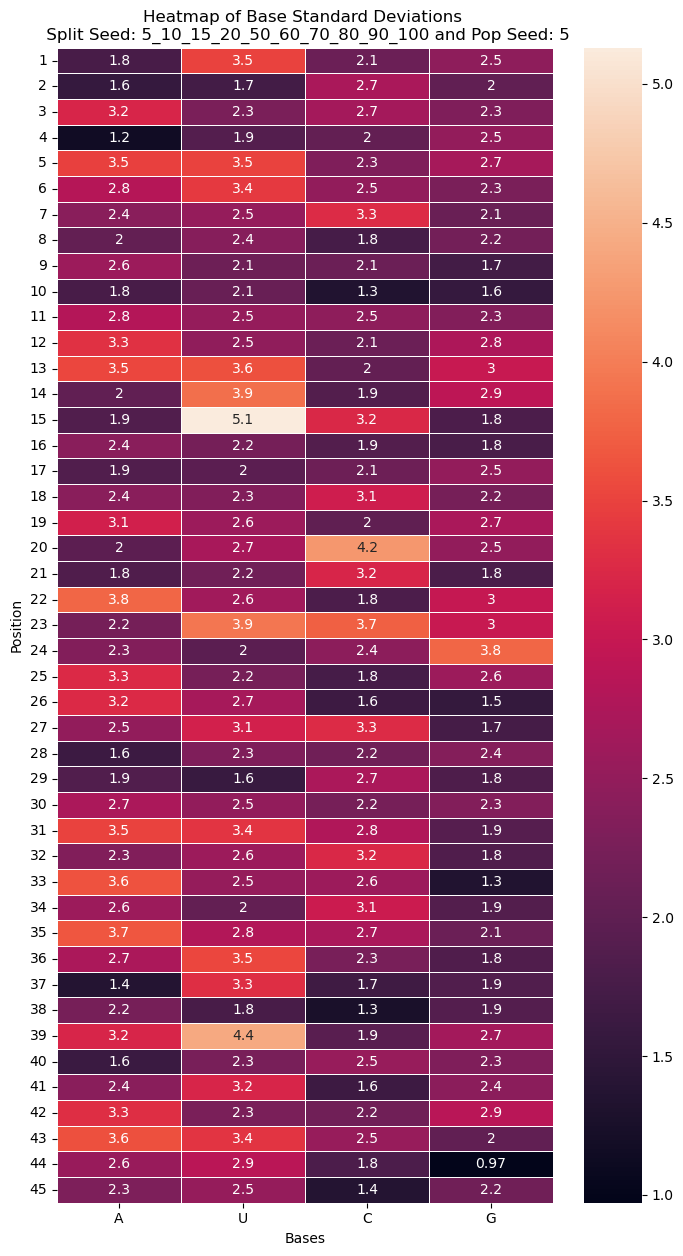

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 15))
svm = sns.heatmap(grouped_stddev, annot=True, linewidths=0.5)

# Customize the plot
plt.title(f"Heatmap of Base Standard Deviations \n Split Seed: {new_splits} and Pop Seed: {seed[0]}")
plt.xlabel("Bases")
plt.ylabel("Position")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

figure = svm.get_figure()
# Save the plot
outfile = f"heatmaps/heatmap_bdna_data_KL25082020_split_seed-{new_splits}_pop_seed-{seed[0]}.png"
figure.savefig(outfile)

In [19]:
#plt.figure(figsize=(8, 15))
#svm = sns.catplot(grouped_stddev,kind="bar")
grouped_stddev.wide

,A,C,G,U
position,,,,
1,1.766981,2.118700,2.458545,3.502380
2,1.567021,2.710064,2.013841,1.712698
3,3.198958,2.674987,2.309401,2.263233
4,1.159502,2.043961,2.503331,1.888562
5,3.478505,2.311805,2.685351,3.503966
6,2.836273,2.496664,2.270585,3.414023
7,2.412928,3.267687,2.097618,2.529822
8,2.043961,1.751190,2.201010,2.378141
9,2.584140,2.118700,1.702939,2.131770


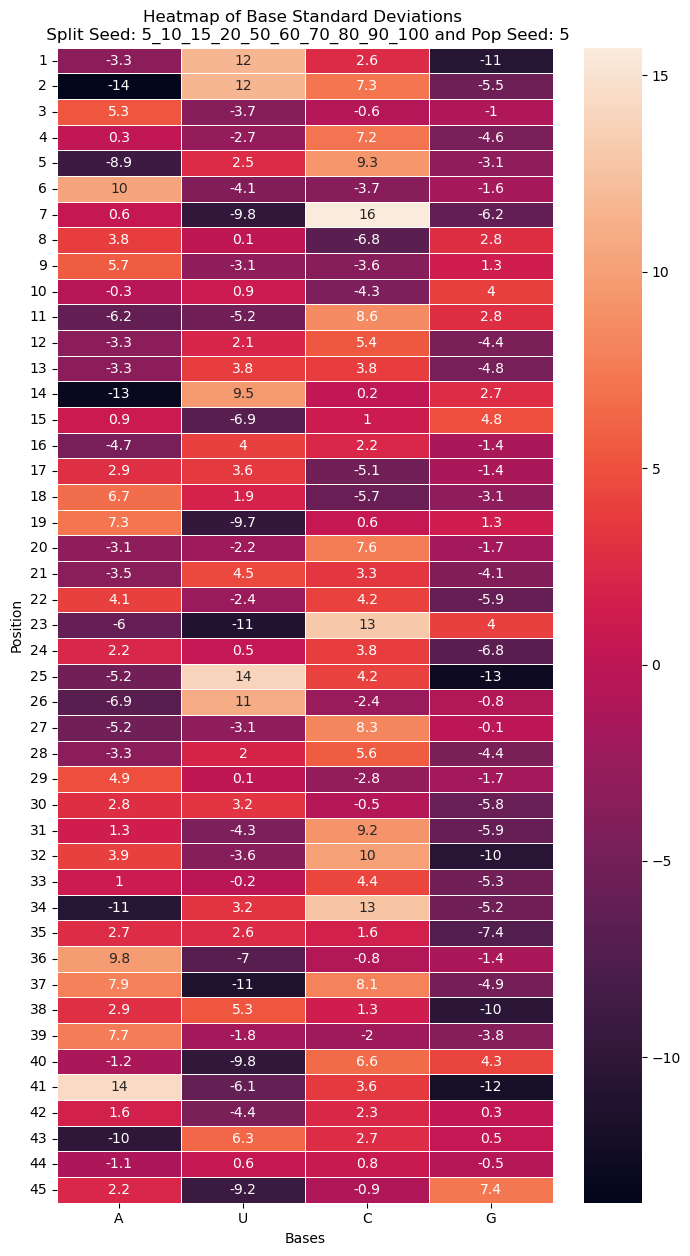

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 15))
svm = sns.heatmap(grouped_mean, annot=True, linewidths=0.5)

# Customize the plot
plt.title(f"Heatmap of Base Standard Deviations \n Split Seed: {new_splits} and Pop Seed: {seed[0]}")
plt.xlabel("Bases")
plt.ylabel("Position")
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show the plot
plt.show()

figure = svm.get_figure()
# Save the plot
outfile = f"heatmaps/heatmap_mean_bdna_data_KL25082020_split_seed-{new_splits}_pop_seed-{seed[0]}.png"
figure.savefig(outfile)